In [1]:
import sys
from glob import glob
sys.path.append('../')
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table

import data
from source_names_dict import source_names_dict, source_names_readable
from get_closest_srcreg import get_src_region_dict

/usr/lib/python3/dist-packages/requests/__init__.py:89: RequestsDependencyWarning: urllib3 (1.26.9) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "


In [22]:
simbad_name = 'NAME_NGC_7793_P13'

In [49]:
src_region_dict = get_src_region_dict()
#tab = data.load_joined(simbad_name='Holmberg_II_X-1', xrt_curve='HARD', uvot_filter='U', src_region_dict=src_region_dict, join_hr=True)
tab = data.load_joined(simbad_name=simbad_name, xrt_curve='PC', uvot_filter='U', src_region_dict=src_region_dict, join_hr=True)
tab.sort('MJD_0')

Getting source region dict
      MJD           MJD_ERR_POS         MJD_ERR_NEG        RATE    ...       MJD_0        FLAG_RATE<=0 FLAG>5STD
---------------- ------------------ ------------------- ---------- ... ------------------ ------------ ---------
55432.3118816477  0.005397662037037  -0.005397662037037 0.04506048 ...                0.0        False     False
55436.7310352998  0.143181041666667  -0.143181041666667 0.04457161 ... 4.4191536521029775        False     False
55440.3077208845       0.1067603125       -0.1067603125 0.03377563 ...  7.995839236798929        False     False
55444.2585312262  0.298325636574074  -0.298325636574074 0.03839336 ...  11.94664957850182        False     False
55448.4378379103 0.0731803472222222 -0.0731803472222222 0.03070673 ... 16.125956262600084        False     False
55456.1675766368 0.0392823611111111 -0.0392823611111111 0.02754333 ... 23.855694989098993        False     False
55460.7857310519   0.17319037037037   -0.17319037037037 0.02422383 ..

In [50]:
tab.columns

<TableColumns names=('MET','EXTNAME','TSTART','TSTOP','EXPOSURE','TELAPSE','TIME','SRC_AREA','BKG_AREA','STD_AREA','PLATE_SCALE','RAW_TOT_CNTS','RAW_TOT_CNTS_ERR','RAW_BKG_CNTS','RAW_BKG_CNTS_ERR','RAW_STD_CNTS','RAW_STD_CNTS_ERR','RAW_TOT_RATE','RAW_TOT_RATE_ERR','RAW_BKG_RATE','RAW_BKG_RATE_ERR','RAW_STD_RATE','RAW_STD_RATE_ERR','COI_STD_FACTOR','COI_STD_FACTOR_ERR','COI_BKG_FACTOR','COI_BKG_FACTOR_ERR','COI_TOT_RATE','COI_TOT_RATE_ERR','COI_BKG_RATE','COI_BKG_RATE_ERR','COI_SRC_RATE','COI_SRC_RATE_ERR','AP_FACTOR','AP_FACTOR_ERR','AP_COI_SRC_RATE','AP_COI_SRC_RATE_ERR','LSS_FACTOR','LSS_RATE','LSS_RATE_ERR','SENSCORR_FACTOR','SENSCORR_RATE','SENSCORR_RATE_ERR','CORR_RATE','CORR_RATE_ERR','AB_MAG','AB_MAG_ERR','AB_MAG_ERR_STAT','AB_MAG_ERR_SYS','AB_MAG_BKG','AB_MAG_BKG_ERR_STAT','AB_MAG_BKG_ERR_SYS','AB_MAG_BKG_ERR','AB_MAG_LIM','AB_MAG_LIM_SIG','AB_MAG_COI_LIM','AB_FLUX_AA','AB_FLUX_AA_ERR_STAT','AB_FLUX_AA_ERR_SYS','AB_FLUX_AA_ERR','AB_FLUX_AA_BKG','AB_FLUX_AA_BKG_ERR_STAT','AB_FLU

In [51]:
time     = tab['MJD_0']
uvot     = tab['COI_SRC_RATE']
uvot_err = tab['COI_SRC_RATE_ERR']
xrt      = tab['RATE_1']
xrt_err  = tab['RATE_ERR_1']
hr       = tab['RATE_2']
hr_err   = tab['RATE_ERR_2']

In [52]:
nbins = 6
hr_bins = np.linspace(min(hr), max(hr), nbins)
hr_bins

array([0.433387 , 0.8925732, 1.3517594, 1.8109456, 2.2701318, 2.729318 ])

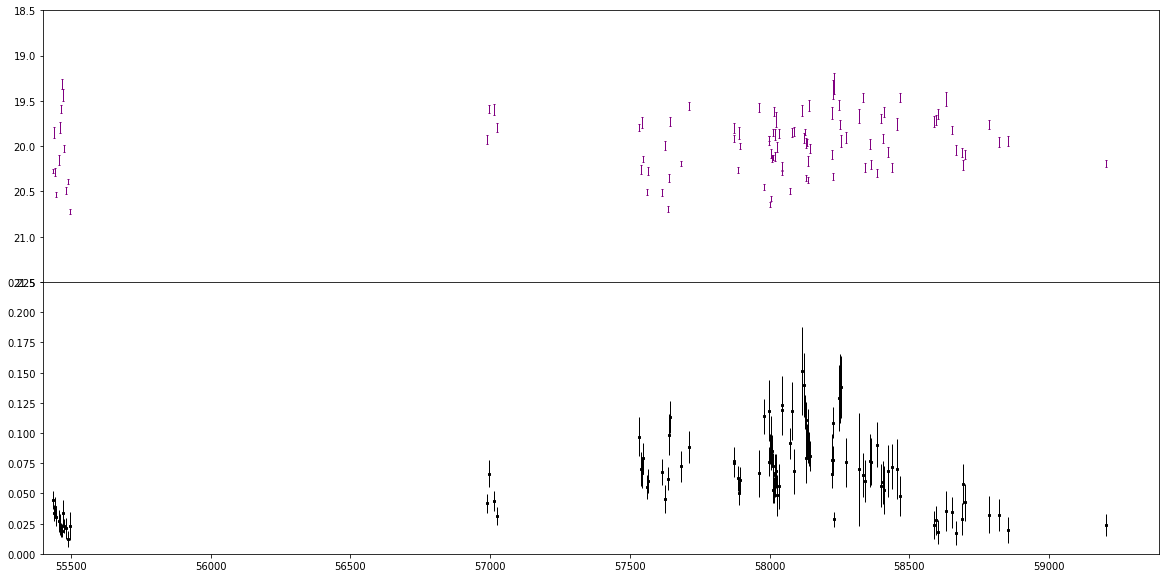

In [62]:

tab = data.load_joined(simbad_name=simbad_name, xrt_curve='PC', uvot_filter='U', src_region_dict=src_region_dict, join_hr=True)
tab.sort('MJD_0')

fig, ax = plt.subplots(2,1, figsize=(20,10), sharex=True)
ax[0].errorbar(tab['MJD'], tab['MAG'], yerr=uvot_err, ls='none', color='purple', lw=1.0, capsize=1.0)
ax[0].set_ylim(18.5, 21.5)
ax[0].invert_yaxis()

ax[1].errorbar(tab['MJD'], tab['RATE_1'], yerr=tab['RATE_ERR_1'], ls='none', color='black', lw=1.0, capsize=0.0, marker='s', markersize=2)
ax[1].set_ylim(0, 0.225)

ax[0].set_xlim(55400)
plt.subplots_adjust(hspace=0)

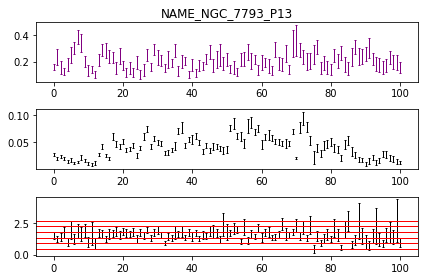

In [27]:
fig, ax = plt.subplots(3,1)
ax[0].set_title(simbad_name)
ax[0].errorbar(range(len(tab)), uvot, yerr=uvot_err, ls='none', color='purple', lw=1.0, capsize=1.0)
ax[1].errorbar(range(len(tab)), xrt, yerr=xrt_err, ls='none', color='black', lw=1.0, capsize=1.0)
ax[2].errorbar(range(len(tab)), hr, yerr=hr_err, ls='none', color='black', lw=1.0, capsize=1.0)

for b in hr_bins:
    ax[2].axhline(b, lw=1.0, color='red')
plt.tight_layout()

bin_lo = 0.433387   bin_hi = 0.8925732  n=5
bin_lo = 0.8925732  bin_hi = 1.3517594  n=21
bin_lo = 1.3517594  bin_hi = 1.8109456  n=45
bin_lo = 1.8109456  bin_hi = 2.2701318  n=21
bin_lo = 2.2701318  bin_hi = 2.729318   n=7


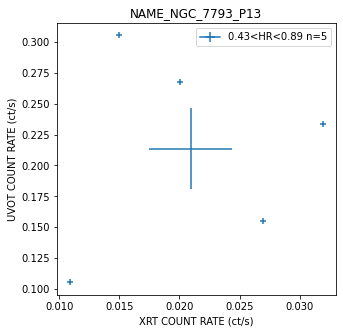

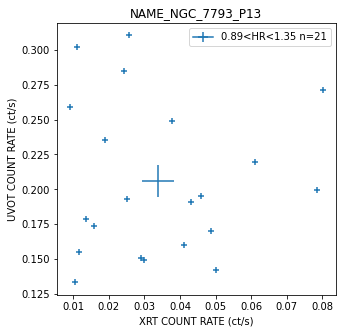

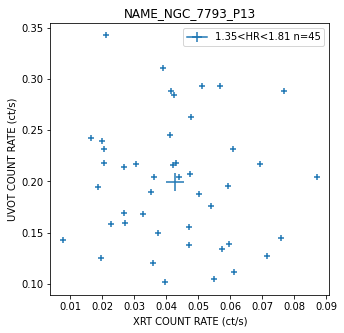

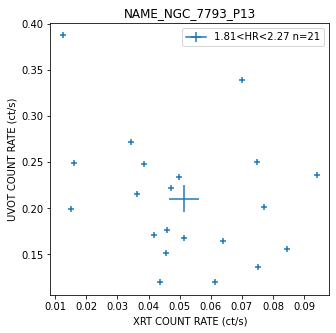

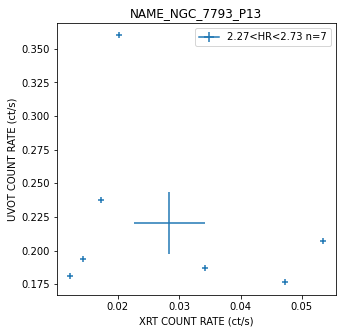

In [28]:

for i in range(nbins-1):
    plt.figure(figsize=(5,5))
    plt.title(simbad_name)
    bin_lo = hr_bins[i]
    bin_hi = hr_bins[i+1]

    sub = tab[(tab['RATE_2'] > bin_lo) & (tab['RATE_2'] < bin_hi)]
    
    n = len(sub)
    print(f'bin_lo = {bin_lo:<10} bin_hi = {bin_hi:<10} n={n}')
    
    xrt_mean    = np.mean(sub['RATE_1'])
    xrt_std     = np.std(sub['RATE_1'])
    xrt_std_err = xrt_std / np.sqrt(n)
    
    uvot_mean    = np.mean(sub['COI_SRC_RATE'])
    uvot_std     = np.std(sub['COI_SRC_RATE'])
    uvot_std_err = uvot_std / np.sqrt(n)
    
    plt.scatter(sub['RATE_1'], sub['COI_SRC_RATE'], marker='+')
    plt.errorbar(x=xrt_mean, y=uvot_mean, xerr=xrt_std_err, yerr=uvot_std_err, label=f'{bin_lo:.2f}<HR<{bin_hi:.2f} n={n}')
    plt.xlabel('XRT COUNT RATE (ct/s)')
    plt.ylabel('UVOT COUNT RATE (ct/s)')
    plt.legend(loc='upper right')
